In [101]:

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

1. Download dataset and preprocess the data from.

In [102]:
df = pd.read_csv("haberman.csv")

In [103]:
df.head()

A   B  C  D
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1

In [104]:
with open("haberman_info.txt") as my_file:
    print(my_file.read())

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [105]:
df.columns = ["Age","YearOfOperation","NoOfPositiveAxillaryNodes","SurvivalStatus"]
df.head()

Age  YearOfOperation  NoOfPositiveAxillaryNodes  SurvivalStatus
0   30               64                          1               1
1   30               62                          3               1
2   30               65                          0               1
3   31               59                          2               1
4   31               65                          4               1

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        306 non-null    int64
 1   YearOfOperation            306 non-null    int64
 2   NoOfPositiveAxillaryNodes  306 non-null    int64
 3   SurvivalStatus             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [107]:
df.shape

(306, 4)

In [108]:
df.describe()

Age  YearOfOperation  NoOfPositiveAxillaryNodes  SurvivalStatus
count  306.000000       306.000000                 306.000000      306.000000
mean    52.457516        62.852941                   4.026144        1.264706
std     10.803452         3.249405                   7.189654        0.441899
min     30.000000        58.000000                   0.000000        1.000000
25%     44.000000        60.000000                   0.000000        1.000000
50%     52.000000        63.000000                   1.000000        1.000000
75%     60.750000        65.750000                   4.000000        2.000000
max     83.000000        69.000000                  52.000000        2.000000

In [109]:
df.isna().sum()

Age                          0
YearOfOperation              0
NoOfPositiveAxillaryNodes    0
SurvivalStatus               0
dtype: int64

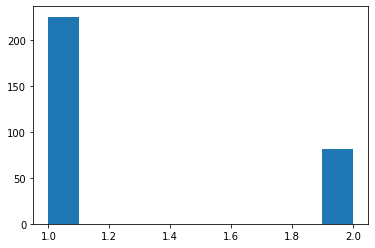

In [110]:
plt.hist(df["SurvivalStatus"]);

2. Divide the dataset into 80% training set and 20% test set.

In [111]:
x = df.drop('SurvivalStatus',axis = 1)
y = df['SurvivalStatus']

scaler = StandardScaler()
x=scaler.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 99)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(244, 3) (62, 3) (244,) (62,)


3.[R] Implement the k-nearest neighbours with k ∈ N as the parameter and distance also as a parameter between
L1 or L2. Report the test accuracy for k = 1, 2, . . . , 5 using both L1 metric and L2 metric.

In [112]:
result_l1 = pd.DataFrame()
result_l2 = pd.DataFrame()
result_l1["k"] = list(range(1,6))
result_l2["k"] = list(range(1,6))

In [113]:
print("Using L1 metric")
result_l1_a = []
for k in [1,2,3,4,5]:
  print("K =",k)
  knn = KNeighborsClassifier(n_neighbors = k,metric = "manhattan").fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  print( "Accuracy: ",accuracy_score(y_test,y_pred))
  result_l1_a.append(accuracy_score(y_test,y_pred))
print("Using L2 metric")
result_l2_a = []
for k in [1,2,3,4,5]:
  print("K =",k)
  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  print( "Accuracy: ",accuracy_score(y_test,y_pred))
  result_l2_a.append(accuracy_score(y_test,y_pred))
result_l1["80.0:20.0"] = result_l1_a
result_l2["80.0:20.0"] = result_l2_a

Using L1 metric
K = 1
Accuracy:  0.6290322580645161
K = 2
Accuracy:  0.7258064516129032
K = 3
Accuracy:  0.6935483870967742
K = 4
Accuracy:  0.6774193548387096
K = 5
Accuracy:  0.6935483870967742
Using L2 metric
K = 1
Accuracy:  0.6612903225806451
K = 2
Accuracy:  0.7419354838709677
K = 3
Accuracy:  0.6774193548387096
K = 4
Accuracy:  0.6774193548387096
K = 5
Accuracy:  0.6774193548387096


4. [R] Repeat the same experiment for 60 : 40, 70 : 30 and 90 : 10. Report the results.

In [114]:
for j in [.4,.3,.1]:
  print(f"For Train and Test Split {(1-j)*100} : {j*100}")
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = j,random_state = 99)
  print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
  print("Using L1 metric")
  result_l1_a = []
  for k in [1,2,3,4,5]:
    print("K =",k)
    knn = KNeighborsClassifier(n_neighbors = k,metric = "manhattan").fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print( "Accuracy: ",accuracy_score(y_test,y_pred))
    result_l1_a.append(accuracy_score(y_test,y_pred))
  print("Using L2 metric")
  result_l2_a = []
  for k in [1,2,3,4,5]:
    print("K =",k)
    knn = KNeighborsClassifier(n_neighbors = k,).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print( "Accuracy: ",accuracy_score(y_test,y_pred))
    result_l2_a.append(accuracy_score(y_test,y_pred))
  result_l1[f"{(1-j)*100}:{j*100}"] = result_l1_a
  result_l2[f"{(1-j)*100}:{j*100}"] = result_l2_a
  print("---------------------------------------------")

For Train and Test Split 60.0 : 40.0
(183, 3) (123, 3) (183,) (123,)
Using L1 metric
K = 1
Accuracy:  0.6178861788617886
K = 2
Accuracy:  0.6747967479674797
K = 3
Accuracy:  0.6097560975609756
K = 4
Accuracy:  0.6747967479674797
K = 5
Accuracy:  0.6504065040650406
Using L2 metric
K = 1
Accuracy:  0.6178861788617886
K = 2
Accuracy:  0.6910569105691057
K = 3
Accuracy:  0.6422764227642277
K = 4
Accuracy:  0.6666666666666666
K = 5
Accuracy:  0.6585365853658537
---------------------------------------------
For Train and Test Split 70.0 : 30.0
(214, 3) (92, 3) (214,) (92,)
Using L1 metric
K = 1
Accuracy:  0.6195652173913043
K = 2
Accuracy:  0.6739130434782609
K = 3
Accuracy:  0.6304347826086957
K = 4
Accuracy:  0.6847826086956522
K = 5
Accuracy:  0.6304347826086957
Using L2 metric
K = 1
Accuracy:  0.6304347826086957
K = 2
Accuracy:  0.6847826086956522
K = 3
Accuracy:  0.6304347826086957
K = 4
Accuracy:  0.6521739130434783
K = 5
Accuracy:  0.6739130434782609
----------------------------------

In [115]:
result_l1

k  80.0:20.0  60.0:40.0  70.0:30.0  90.0:10.0
0  1   0.629032   0.617886   0.619565   0.516129
1  2   0.725806   0.674797   0.673913   0.677419
2  3   0.693548   0.609756   0.630435   0.612903
3  4   0.677419   0.674797   0.684783   0.645161
4  5   0.693548   0.650407   0.630435   0.580645

In [116]:
result_l2

k  80.0:20.0  60.0:40.0  70.0:30.0  90.0:10.0
0  1   0.661290   0.617886   0.630435   0.580645
1  2   0.741935   0.691057   0.684783   0.741935
2  3   0.677419   0.642276   0.630435   0.645161
3  4   0.677419   0.666667   0.652174   0.645161
4  5   0.677419   0.658537   0.673913   0.612903

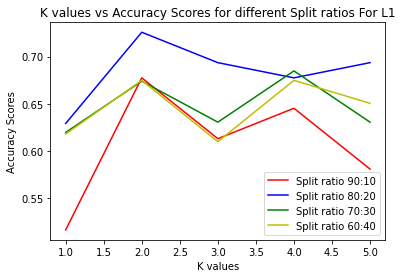

In [117]:
plt.plot(result_l1["k"],result_l1["90.0:10.0"],color = "r",label = "Split ratio 90:10")
plt.plot(result_l1["k"],result_l1["80.0:20.0"],color = "b",label = "Split ratio 80:20")
plt.plot(result_l1["k"],result_l1["70.0:30.0"],color = "g",label = "Split ratio 70:30")
plt.plot(result_l1["k"],result_l1["60.0:40.0"],color = "y",label = "Split ratio 60:40")
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
plt.title("K values vs Accuracy Scores for different Split ratios For L1")
plt.legend();

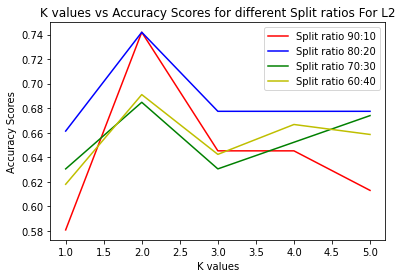

In [118]:
plt.plot(result_l2["k"],result_l2["90.0:10.0"],color = "r",label = "Split ratio 90:10")
plt.plot(result_l2["k"],result_l2["80.0:20.0"],color = "b",label = "Split ratio 80:20")
plt.plot(result_l2["k"],result_l2["70.0:30.0"],color = "g",label = "Split ratio 70:30")
plt.plot(result_l2["k"],result_l2["60.0:40.0"],color = "y",label = "Split ratio 60:40")
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
plt.title("K values vs Accuracy Scores for different Split ratios For L2")
plt.legend();